<a href="https://colab.research.google.com/github/YadavDhirendra/Jupyter-Notebooks/blob/main/Churn_modelling_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:

import tensorflow

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [7]:
data = pd.read_csv("Churn_Modelling.csv")

In [8]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
data.shape

(10000, 14)

In [10]:
# Splitting data into independent and target variables
X = data.iloc[:, 3:13]
Y = data.iloc[:,13]


In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [19]:
Y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
# Converting categorical var. into numerical variavles using dummies
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first=True)

In [ ]:
# Dropping geography and gender features
X = X.drop(['Geography','Gender'], axis = 1)

In [ ]:
X.shape

In [21]:
X = pd.concat([X, geography, gender], axis = 1)

In [22]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male',
       'Germany', 'Spain', 'Male'],
      dtype='object')

In [23]:
# splitting data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)


In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [28]:
# ANN building
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU, ReLU
from keras.layers import Dropout

In [82]:
# initialize ANN
classifier = Sequential()


In [83]:
# Adding the input layers
classifier.add(Dense(units=11, activation='relu'))

In [84]:
# Adding 1st hidden layers
classifier.add(Dense(units=7, activation='relu'))
classifier.add(Dropout(0.3))

In [85]:
# Adding 2nd hidden layers
classifier.add(Dense(units=6, activation='relu'))
classifier.add(Dropout(0.3))

In [86]:
# Adding output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [87]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy',metrics=['accuracy'] )

In [88]:
Adam = tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [89]:
# Early Stopping
early_stopping=keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)

In [90]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100, callbacks=early_stopping)

Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6147 - loss: 0.7180 - val_accuracy: 0.7955 - val_loss: 0.5049
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8021 - loss: 0.5019 - val_accuracy: 0.7989 - val_loss: 0.4544
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8045 - loss: 0.4774 - val_accuracy: 0.8058 - val_loss: 0.4425
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8036 - loss: 0.4633 - val_accuracy: 0.8114 - val_loss: 0.4360
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8149 - loss: 0.4542 - val_accuracy: 0.8171 - val_loss: 0.4294
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8198 - loss: 0.4384 - val_accuracy: 0.8190 - val_loss: 0.4226
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8247 - loss: 0.4224 - val_accuracy: 0.8254 - val_loss: 0.4146
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8246 - loss: 0.4326 - val_accu

In [91]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

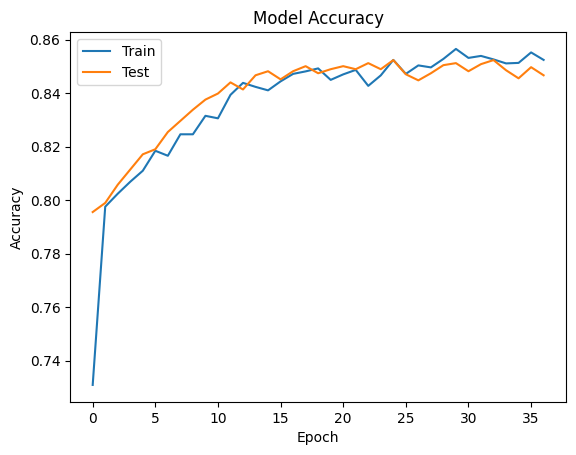

In [92]:
# plotting accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


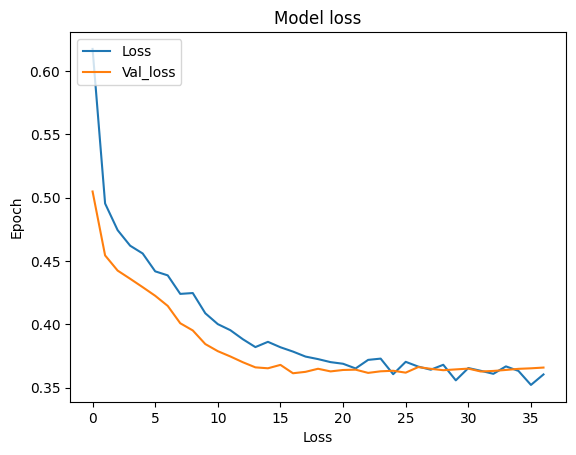

In [93]:
# plotting loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.ylabel('Epoch')
plt.xlabel('Loss')
plt.legend(['Loss', 'Val_loss'], loc='upper left')
plt.show()


In [94]:
# Part 3 : Making predictions and evaluating the model

# predicting the output
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [97]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1540,   55],
       [ 220,  185]])

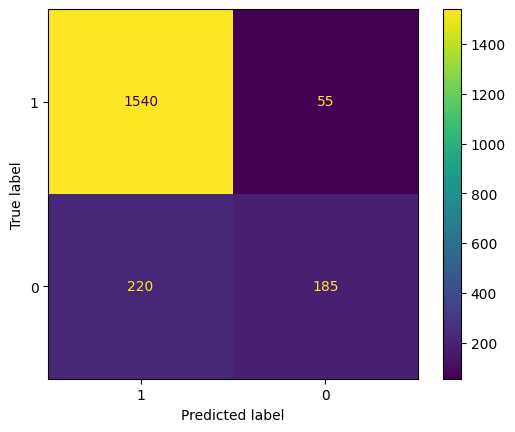

In [102]:
# confusion matrix display
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[1,0])
disp.plot()
plt.show()

In [96]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8625